In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import classification_report
import numpy as np

In [19]:
# Load and preprocess the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [21]:
# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")  # 10 neurons for 10 classes
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Compile the model
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [25]:
# Train the model
history_model = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7278 - loss: 1.0567 - val_accuracy: 0.9029 - val_loss: 0.3588
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9014 - loss: 0.3578 - val_accuracy: 0.9192 - val_loss: 0.2934
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9176 - loss: 0.2923 - val_accuracy: 0.9271 - val_loss: 0.2619
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9258 - loss: 0.2639 - val_accuracy: 0.9320 - val_loss: 0.2393
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9342 - loss: 0.2354 - val_accuracy: 0.9391 - val_loss: 0.2178
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9392 - loss: 0.2188 - val_accuracy: 0.9416 - val_loss: 0.2039
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9442 - loss: 0.2015 - val_accuracy: 0.9462 - val_loss: 0.1901
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9487 - loss: 0.1881 - 

In [45]:
# Make predictions on the test set with batch_size=128
predictions = model.predict(x_test, batch_size=128)
print(predictions)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[4.0260144e-05 2.2864991e-07 5.5142585e-04 ... 9.9570340e-01
  1.9539493e-05 1.7519559e-04]
 [3.7308986e-04 3.2413012e-05 9.8994738e-01 ... 1.1881009e-10
  4.3430773e-04 1.2776943e-09]
 [7.9480360e-06 9.8350036e-01 6.5108109e-03 ... 3.8328031e-03
  1.5452178e-03 2.2934332e-04]
 ...
 [5.2022092e-08 1.8732018e-07 6.0975640e-06 ... 1.5713877e-04
  2.2221785e-03 5.3195241e-03]
 [3.5881072e-05 4.3426167e-05 2.4633997e-05 ... 5.0623976e-07
  5.4707439e-03 6.6502121e-06]
 [5.3655531e-05 4.6081579e-09 1.2557935e-04 ... 3.3897447e-09
  2.3464297e-07 2.7804854e-08]]


In [29]:
# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

In [31]:
# Generate a classification report
print("Classification Report:\n", classification_report(y_test, predicted_classes, target_names=[str(x) for x in range(10)]))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.95      0.94      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.94      0.94      0.94       892
           6       0.95      0.96      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



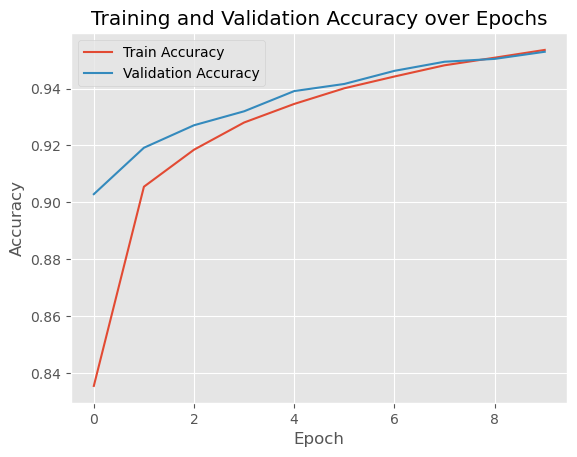

In [41]:
# Plot training and validation accuracy
plt.plot(history_model.history["accuracy"], label="Train Accuracy")
plt.plot(history_model.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.title("Training and Validation Accuracy over Epochs")
plt.show()

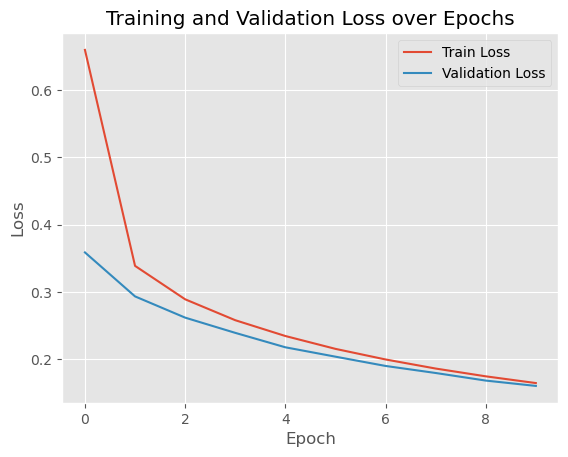

In [39]:

# Plot training and validation loss
plt.plot(history_model.history["loss"], label="Train Loss")
plt.plot(history_model.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss over Epochs")
plt.show()
